## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

In [69]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from statsmodels.api import add_constant

print(features)

features_tmp = add_constant(features)
print(features_tmp)

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features_tmp.shape[1])
w_analytic = inv(features_tmp.T @ features_tmp) @ (features_tmp.T) @ y

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)

print(f'Аналитически определённые коэффициенты {w_analytic}')
print(f"Коэффициенты, вычисленные моделью sklearn {np.concatenate((np.array(reg.intercept_), np.array(reg.coef_)), axis=None)}")

print(f"Евклидово расстояние между наборами коэффициентов {norm(np.concatenate((np.array(reg.intercept_), np.array(reg.coef_)), axis=None) - w_analytic)}\n")


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.6867

## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

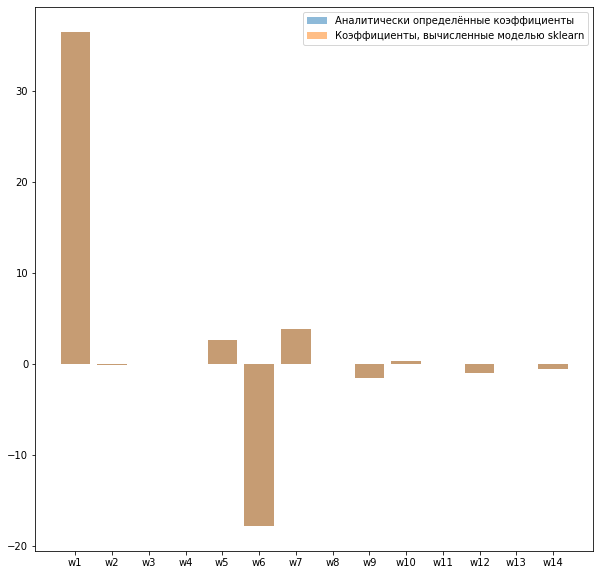

In [71]:
import matplotlib.pyplot as plt

#-------- ВАШ КОД ТУТ -------------------
f, ax = plt.subplots(figsize=(10,10))
ax.bar([f"w{i}" for i in range(1, len(w_analytic)+1)], w_analytic, alpha = 0.5, label='Аналитически определённые коэффициенты')
ax.bar([f"w{i}" for i in range(1, len(np.concatenate((np.array(reg.intercept_), np.array(reg.coef_)), axis=None))+1)], np.concatenate((np.array(reg.intercept_), np.array(reg.coef_)), axis=None), alpha = 0.5, label='Коэффициенты, вычисленные моделью sklearn')
plt.legend()
plt.show()




#----------------------------------------

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)^2$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

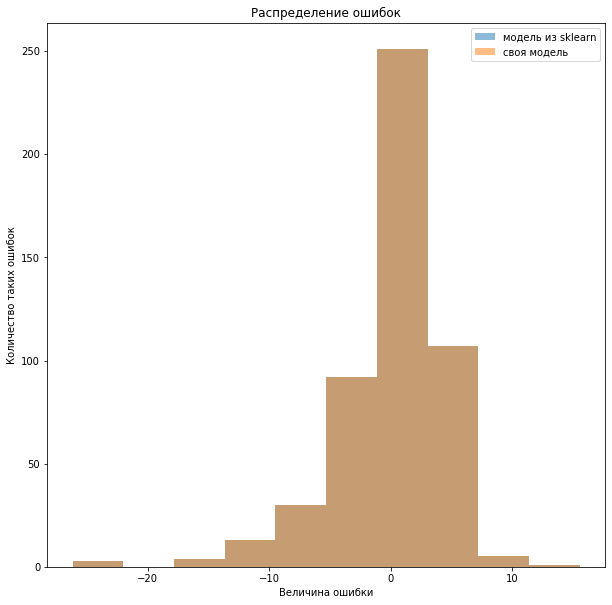

In [73]:
#-------- ВАШ КОД ТУТ -------------------
y_true = y
y_pred_sklearn = reg.predict(features)
y_pred_analytic = features_tmp @ w_analytic


fig, ax = plt.subplots(figsize=(10,10))

ax.hist(y_pred_sklearn - y_true, alpha=0.5, label='модель из sklearn')
ax.hist(y_pred_analytic - y_true, alpha=0.5, label='своя модель')

ax.set_title('Распределение ошибок')
ax.set_xlabel('Величина ошибки')
ax.set_ylabel('Количество таких ошибок')
plt.legend()
plt.show()

#----------------------------------------

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Модель из sklearn:')
print('RMSE = %s' % np.sqrt(mean_squared_error(y_true, y_pred_sklearn)))
print("r2_score = %s" % r2_score(y_true, y_pred_sklearn))
print("MAE = %s" % mean_absolute_error(y_pred_sklearn, y_true))

print('\nСвоя модель:')
print('RMSE = %s' % np.sqrt(mean_squared_error(y_true, y_pred_analytic)))
print("r2_score = %s" % r2_score(y_true, y_pred_analytic))
print("MAE = %s" % mean_absolute_error(y_pred_analytic, y_true))

Модель из sklearn:
RMSE = 4.679191295697281
r2_score = 0.7406426641094095
MAE = 3.2708628109003115

Своя модель:
RMSE = 4.679191295697282
r2_score = 0.7406426641094094
MAE = 3.2708628109000486
